https://www.signalintegrityjournal.com/blogs/7-voice-of-the-experts-signal-integrity/post/355-via-stubs-are-they-all-bad?v=preview

https://en.wikipedia.org/wiki/Sine_wave

In [145]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [146]:
f = 1 * 1000000000 # (Hz)
c = 300000000 # Speed of light (m/s)
Dk = 9.1 # Dielectric Constant

sl = 0.02486 # Stub length

In [147]:
wl = c/(f*np.sqrt(Dk))
wl

0.09944903161976938

In [148]:
# Compute the area using the composite trapezoidal rule.
def rms(values):
    return np.sqrt(np.mean(values**2))

# Computed reflected phase delay as % (not radians)
def reflectedphasedelay(sl,wl):
    CD = (sl%wl)/wl
    TD = 2 * CD
    return TD

display(reflectedphasedelay(sl,wl))

0.4999545917158655

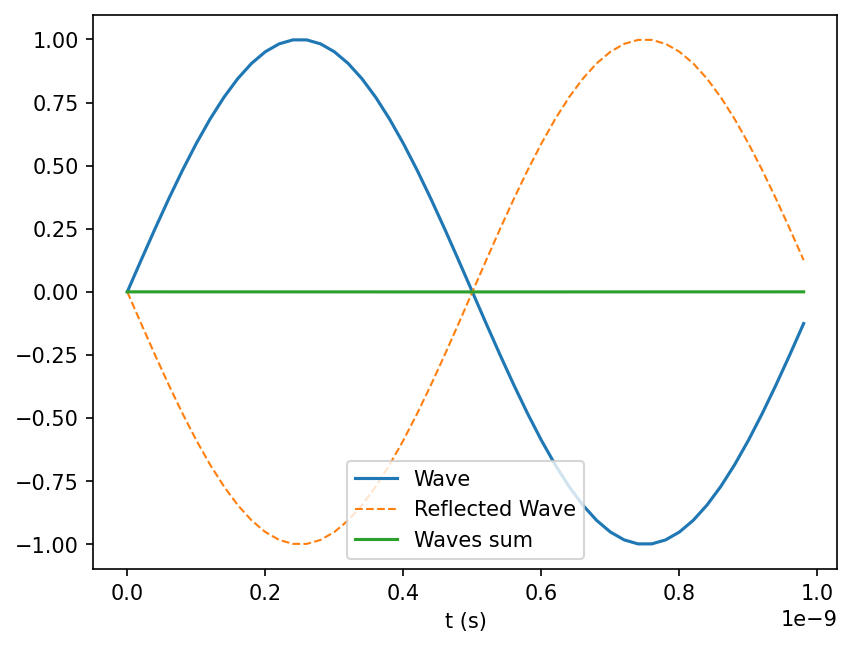

In [149]:
omega = 2 * np.pi * f
phase = 2 * np.pi * reflectedphasedelay(sl,wl)

trange = 1/f
dt = trange/50

time = np.arange(0, trange, dt)
wave = np.sin(omega * time)
waveref = np.sin(omega * time + phase)
insertion = (wave + waveref)/2

fig = plt.figure(dpi=150)
ax = fig.add_subplot()
ax.plot(time, wave, label='Wave')
ax.plot(time, waveref, '--', linewidth=1, label='Reflected Wave')
ax.plot(time, insertion, label='Waves sum')

ax.set_xlabel("t (s)")
# ax.set_ylabel("wave")
ax.legend(loc='best')

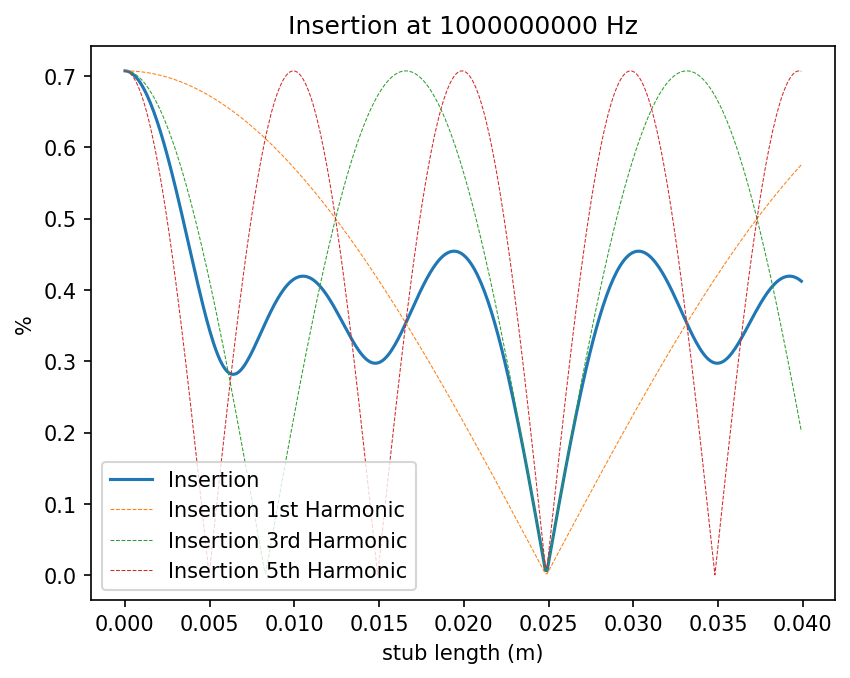

In [151]:
sls = []
insloss = []
insloss1 = []
insloss3 = []
insloss5 = []

for sl in np.arange(0.00001,0.04,0.0001):
    
    time = np.arange(0, trange, dt)
    wave = np.sin(omega * time)
    
    phase = 2 * np.pi * reflectedphasedelay(sl,wl)
    refwave1 = np.sin(omega * time + phase)
    refwave3 = np.sin(omega * time + 2 * np.pi * reflectedphasedelay(sl,wl/3))
    refwave5 = np.sin(omega * time + 2 * np.pi * reflectedphasedelay(sl,wl/5))
    insertion1 = (wave + refwave1)/2
    insertion3 = (wave + refwave3)/2
    insertion5 = (wave + refwave5)/2
    rmsinsertion = rms((insertion1+insertion3+insertion5)/3)
    rmsinsertion1 = rms(insertion1)
    rmsinsertion3 = rms(insertion3)
    rmsinsertion5 = rms(insertion5)

    insloss.append(rmsinsertion)
    insloss1.append(rmsinsertion1)
    insloss3.append(rmsinsertion3)
    insloss5.append(rmsinsertion5)
    sls.append(sl)

# print(sls,insloss)
fig = plt.figure(dpi=150)
ax = fig.add_subplot()
ax.plot(sls, insloss, label='Insertion')
ax.plot(sls, insloss1, '--', lw=0.5, label='Insertion 1st Harmonic')
ax.plot(sls, insloss3, '--', lw=0.5, label='Insertion 3rd Harmonic')
ax.plot(sls, insloss5, '--', lw=0.5, label='Insertion 5th Harmonic')
ax.set_title(f"Insertion at {f} Hz")
ax.set_xlabel("stub length (m)")
ax.set_ylabel("%")
ax.legend(loc='best')